<a href="https://colab.research.google.com/github/rohithdonthi/Energy-Market-Forecasting-and-Policy-Impact-Analysis/blob/main/Final_Semester_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/annual_generation_state.csv')
df.head()

,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
0,1990,AK,Total Electric Power Industry,Total,"5,599,506"
1,1990,AK,Total Electric Power Industry,Coal,"510,573"
2,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,"974,521"
3,1990,AK,Total Electric Power Industry,Natural Gas,"3,466,261"
4,1990,AK,Total Electric Power Industry,Petroleum,"497,116"


In [ ]:
df.rename(columns={
    "YEAR": "year",
    "STATE": "state",
    "TYPE OF PRODUCER": "producer_type",
    "ENERGY SOURCE": "energy_source",
    "GENERATION (Megawatthours)": "generation"
}, inplace=True)

In [ ]:
df.head()

,year,state,producer_type,energy_source,generation
0,1990,AK,Total Electric Power Industry,Total,"5,599,506"
1,1990,AK,Total Electric Power Industry,Coal,"510,573"
2,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,"974,521"
3,1990,AK,Total Electric Power Industry,Natural Gas,"3,466,261"
4,1990,AK,Total Electric Power Industry,Petroleum,"497,116"


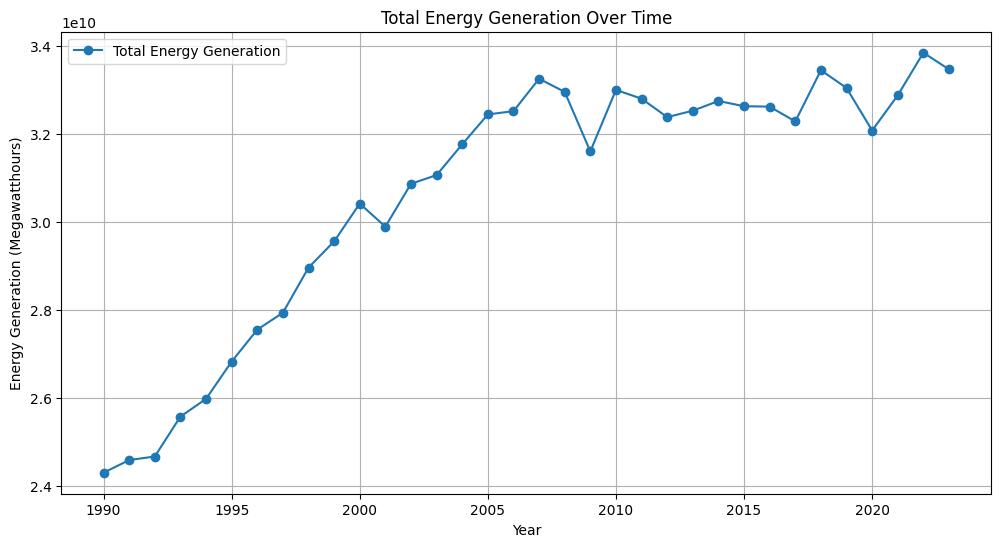

In [ ]:
df['generation'] = df['generation'].replace({',': ''}, regex=True).astype(float)
energy_trend = df.groupby('year')['generation'].sum()


plt.figure(figsize=(12, 6))
plt.plot(energy_trend.index, energy_trend.values, marker='o', linestyle='-', label="Total Energy Generation")
plt.xlabel("Year")
plt.ylabel("Energy Generation (Megawatthours)")
plt.title("Total Energy Generation Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62282 entries, 0 to 62281
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           62282 non-null  int64  
 1   state          62282 non-null  object 
 2   producer_type  62282 non-null  object 
 3   energy_source  62282 non-null  object 
 4   generation     62282 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.4+ MB


In [ ]:
df['generation'] = df['generation'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62282 entries, 0 to 62281
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           62282 non-null  int64 
 1   state          62282 non-null  object
 2   producer_type  62282 non-null  object
 3   energy_source  62282 non-null  object
 4   generation     62282 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.4+ MB


In [ ]:
unique_states = df['state'].unique()
print(unique_states)

['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'US-TOTAL' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY' '  ' 'US-Total']


In [ ]:
df = df[~df['state'].isin(['US-Total', 'US-TOTAL', '  '])]
df['state'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

year             0
state            0
producer_type    0
energy_source    0
generation       0
dtype: int64


In [ ]:
df.head()

,year,state,producer_type,energy_source,generation
0,1990,AK,Total Electric Power Industry,Total,5599506
1,1990,AK,Total Electric Power Industry,Coal,510573
2,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,974521
3,1990,AK,Total Electric Power Industry,Natural Gas,3466261
4,1990,AK,Total Electric Power Industry,Petroleum,497116


In [ ]:
 df = df.sort_values(by=["year", "state", "energy_source"])
 df["lag_1"] = df.groupby(["state", "energy_source"])["generation"].shift(1)
 df["lag_2"] = df.groupby(["state", "energy_source"])["generation"].shift(2)
 df["lag_3"] = df.groupby(["state", "energy_source"])["generation"].shift(3)

In [ ]:
df.head()

,year,state,producer_type,energy_source,generation,lag_1,lag_2,lag_3
1,1990,AK,Total Electric Power Industry,Coal,510573,NaN,NaN,NaN
8,1990,AK,"Electric Generators, Electric Utilities",Coal,311960,510573.0,NaN,NaN
18,1990,AK,"Combined Heat and Power, Commercial Power",Coal,198613,311960.0,510573.0,NaN
2,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,974521,NaN,NaN,NaN
9,1990,AK,"Electric Generators, Electric Utilities",Hydroelectric Conventional,974521,974521.0,NaN,NaN


In [ ]:
energy_mapping = {
    'Natural Gas': 'Natural Gas',
    'Coal': 'Other Fossil',
    'Petroleum': 'Other Fossil',
    'Other Gases': 'Other Fossil',
    'Nuclear': 'Nuclear and Renewable',
    'Hydroelectric Conventional': 'Nuclear and Renewable',
    'Solar': 'Nuclear and Renewable',
    'Wind': 'Nuclear and Renewable',
    'Wood': 'Nuclear and Renewable',
    'Geothermal': 'Nuclear and Renewable',
    'Other Biomass': 'Nuclear and Renewable',
    'Pumped Storage': 'Nuclear and Renewable',
    'Other': 'Other Fossil'
}

df['energy_category'] = df['energy_source'].map(energy_mapping)

print(df[['energy_source', 'energy_category']].drop_duplicates())

                      energy_source        energy_category
1                              Coal           Other Fossil
2        Hydroelectric Conventional  Nuclear and Renewable
3                       Natural Gas            Natural Gas
4                         Petroleum           Other Fossil
0                             Total                    NaN
5                              Wind  Nuclear and Renewable
6       Wood and Wood Derived Fuels                    NaN
24                          Nuclear  Nuclear and Renewable
25                    Other Biomass  Nuclear and Renewable
26                      Other Gases           Other Fossil
56                   Pumped Storage  Nuclear and Renewable
100                      Geothermal  Nuclear and Renewable
104                           Other           Other Fossil
109  Solar Thermal and Photovoltaic                    NaN


In [ ]:
df = df[df['energy_source'] != 'Total']

In [ ]:
energy_mapping.update({
    'Wood and Wood Derived Fuels': 'Nuclear and Renewable',
    'Solar Thermal and Photovoltaic': 'Nuclear and Renewable'
})

In [ ]:
df['energy_category'] = df['energy_source'].map(energy_mapping)

In [ ]:
print(df[['energy_source', 'energy_category']])

                        energy_source        energy_category
1                                Coal           Other Fossil
8                                Coal           Other Fossil
18                               Coal           Other Fossil
2          Hydroelectric Conventional  Nuclear and Renewable
9          Hydroelectric Conventional  Nuclear and Renewable
...                               ...                    ...
62262  Solar Thermal and Photovoltaic  Nuclear and Renewable
62274  Solar Thermal and Photovoltaic  Nuclear and Renewable
62263                            Wind  Nuclear and Renewable
62275                            Wind  Nuclear and Renewable
62281                            Wind  Nuclear and Renewable

[50644 rows x 2 columns]


In [ ]:
missing_categories = df['energy_category'].isna()
print("Remaining missing values in energy_category:\n", missing_categories)

Remaining missing values in energy_category:
 1        False
8        False
18       False
2        False
9        False
         ...  
62262    False
62274    False
62263    False
62275    False
62281    False
Name: energy_category, Length: 50644, dtype: bool


In [ ]:
missing_generation = df['generation'].isna().sum()
print(f"Missing values in 'generation': {missing_generation}")

Missing values in 'generation': 0


In [ ]:
df['generation'] = df['generation'].fillna(1e-6)

In [ ]:
df['generation'] = df['generation'].replace({',': ''}, regex=True).astype(float)

In [ ]:
def clr_transformation(series, eps=1e-6):
    series = series.copy()
    series[series <= 0] = eps

    if series.nunique() == 1:
        return np.zeros_like(series)

    geometric_mean = np.exp(np.mean(np.log(series)))
    return np.log(series / geometric_mean)

df['clr_generation'] = df.groupby(['state', 'year'])['generation'].transform(clr_transformation)
print(df[['state', 'year', 'generation', 'clr_generation']].head())

   state  year  generation  clr_generation
1     AK  1990    510573.0        3.554655
8     AK  1990    311960.0        3.061997
18    AK  1990    198613.0        2.610480
2     AK  1990    974521.0        4.201068
9     AK  1990    974521.0        4.201068


In [ ]:
extreme_neg_values = df[df['clr_generation'] < -10]
print(f"Extreme negative values count: {len(extreme_neg_values)}")

Extreme negative values count: 3889


In [ ]:
df = df[df['clr_generation'] > -10]

In [ ]:
df_pivot = df.pivot_table(
    index=['state', 'year'],
    columns='energy_category',
    values='clr_generation',
    aggfunc='sum'
).reset_index()

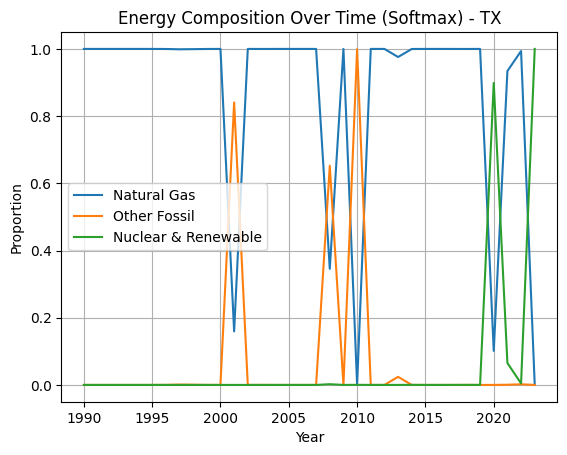

In [ ]:
def softmax(row):
    e_x = np.exp(row - np.max(row))
    return e_x / e_x.sum()

softmax_df = df_pivot.copy()
softmax_df[['NG_soft', 'OF_soft', 'NR_soft']] = softmax_df[['Natural Gas', 'Other Fossil', 'Nuclear and Renewable']].apply(softmax, axis=1)

state_plot = 'TX'
state_soft = softmax_df[softmax_df['state'] == state_plot]

plt.plot(state_soft['year'], state_soft['NG_soft'], label='Natural Gas')
plt.plot(state_soft['year'], state_soft['OF_soft'], label='Other Fossil')
plt.plot(state_soft['year'], state_soft['NR_soft'], label='Nuclear & Renewable')
plt.title(f"Energy Composition Over Time (Softmax) - {state_plot}")
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df_pivot = df_pivot.fillna(0)

In [ ]:
vectorized_data = df_pivot.pivot(index='year', columns='state', values=['Natural Gas', 'Other Fossil', 'Nuclear and Renewable'])

In [ ]:
vectorized_data.columns = [f"{energy}_{state}" for energy, state in vectorized_data.columns]

In [ ]:
vectorized_data = vectorized_data.reset_index()

In [ ]:
from sklearn.linear_model import LinearRegression

data = vectorized_data.dropna()
X = data[['year']]
Y = data.drop(columns=['year'])

model = LinearRegression()
model.fit(X, Y)

print("Regression coefficients shape:", model.coef_.shape)

Regression coefficients shape: (153, 1)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

Y_pred = model.predict(X)

print("R2 score:", r2_score(Y, Y_pred))
print("RMSE:", np.sqrt(mean_squared_error(Y, Y_pred)))

R2 score: 0.43358096589136785
RMSE: 10.29975914974307


In [ ]:
vectorized_data.head()

,year,Natural Gas_AK,Natural Gas_AL,Natural Gas_AR,Natural Gas_AZ,Natural Gas_CA,Natural Gas_CO,Natural Gas_CT,Natural Gas_DC,Natural Gas_DE,...,Nuclear and Renewable_SD,Nuclear and Renewable_TN,Nuclear and Renewable_TX,Nuclear and Renewable_UT,Nuclear and Renewable_VA,Nuclear and Renewable_VT,Nuclear and Renewable_WA,Nuclear and Renewable_WI,Nuclear and Renewable_WV,Nuclear and Renewable_WY
0,1990,14.461423,-1.905304,3.893868,-2.972898,21.868309,17.058913,10.776601,0.0,-1.858406,...,6.201658,29.295917,-19.041588,15.776547,15.060479,39.037003,58.646761,-2.288165,2.406067,1.635762
1,1991,14.907956,-2.539543,4.095778,0.755169,16.808862,17.489902,16.290858,0.0,11.822255,...,6.253369,30.433234,-18.459541,15.366311,10.258236,37.503598,55.767945,-8.917738,8.574666,0.649839
2,1992,14.708093,-2.262083,6.691179,-2.573890,23.168229,12.506317,13.511794,0.0,-2.119711,...,7.567368,29.001131,-17.060812,20.865520,12.571353,41.739767,45.911079,30.190641,6.303022,-2.660690
3,1993,15.013463,-5.517440,12.117175,-2.940427,16.642190,20.971450,15.659051,0.0,-1.719190,...,5.418956,24.921878,-19.091252,19.582806,6.423339,42.819921,41.785148,28.019655,5.044376,9.595481
4,1994,14.640810,-5.018317,14.061611,-4.118758,18.239651,18.858220,7.882221,0.0,-0.362881,...,6.257196,28.267656,-17.987545,19.635451,8.855353,43.632992,35.545036,24.989673,4.438859,0.483701


In [ ]:
from statsmodels.tsa.api import VAR
import warnings
warnings.filterwarnings("ignore")

state_wise_series = {}

for state in df['state'].unique():
    state_df = df_pivot[df_pivot['state'] == state].sort_values(by='year')
    state_df = state_df[['year', 'Natural Gas', 'Other Fossil', 'Nuclear and Renewable']].set_index('year')
    state_wise_series[state] = state_df


var_results = {}

for state, series in state_wise_series.items():
    try:
        series = series.dropna()

        if any(series.nunique() <= 1):
            print(f"Skipping {state}: One or more series is constant.")
            continue

        if not all(series.apply(lambda x: adfuller(x)[1] < 0.05)):
            series = series.diff().dropna()

        model = VAR(series)
        results = model.fit(maxlags=1)

        if np.all(np.linalg.eigvals(results.sigma_u) > 0):
            var_results[state] = results
        else:
            print(f"Skipping {state}: Covariance matrix not positive definite.")
    except Exception as e:
        print(f"VAR model failed for {state}: {e}")

Skipping HI: One or more series is constant.


In [ ]:
var_results.keys()

dict_keys(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])

In [ ]:
model_stats = []

for state, model in var_results.items():
    try:
        stats = {
            'state': state,
            'AIC': model.aic,
            'BIC': model.bic,
            'NumObs': model.nobs
        }
        model_stats.append(stats)
    except Exception as e:
        print(f"Failed to extract stats for {state}: {e}")

model_stats_df = pd.DataFrame(model_stats)
model_stats_df.sort_values(by='AIC').head()

,state,AIC,BIC,NumObs
49,WY,7.987882,8.537533,32
37,PA,8.745466,9.295117,32
33,NY,8.996519,9.546170,32
30,NJ,9.086459,9.636110,32
17,LA,9.155579,9.705230,32


In [ ]:
model_stats_df.head()

,state,AIC,BIC,NumObs
0,AK,9.860320,10.409971,32
1,AL,10.371056,10.920707,32
2,AR,9.627002,10.176653,32
3,AZ,10.795371,11.345022,32
4,CA,9.864771,10.414422,32


In [ ]:
print(var_results['NJ'].summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 01, Apr, 2025
Time:                     19:48:25
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    9.63611
Nobs:                     32.0000    HQIC:                   9.26865
Log likelihood:          -269.601    FPE:                    8869.75
AIC:                      9.08646    Det(Omega_mle):         6229.51
--------------------------------------------------------------------
Results for equation Natural Gas
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                            0.852959         0.545774            1.563           0.118
L1.Natural Gas                  -0.440802         0.294972           -1.494           0.135
L1.Other F

In [ ]:
print(var_results['CA'].summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 01, Apr, 2025
Time:                     19:48:25
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    10.4144
Nobs:                     32.0000    HQIC:                   10.0470
Log likelihood:          -282.054    FPE:                    19316.5
AIC:                      9.86477    Det(Omega_mle):         13566.6
--------------------------------------------------------------------
Results for equation Natural Gas
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                            0.953601         0.614879            1.551           0.121
L1.Natural Gas                   0.012033         0.425079            0.028           0.977
L1.Other F